<a href="https://colab.research.google.com/github/ShahnazSana/Assignment-6/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print("Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(Breast_Cancer_Wisconsin_Dataset.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0

Understanding Diagnosis:
M (Malignant = Dangerous Cancer):  212 patients
B (Benign = Harmless Cancer):      357 patients
Total patients:                    569 patients


In [11]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")
important_features = [
    'radius_mean',
    'texture_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
]
X = data[important_features]
y = data['diagnosis_numeric']
print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")



Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 5)
y (diagnosis): (569,)


**Question no 1 ans**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean
412        9.397         21.68      268.8          0.07969           0.06053
461       27.420         26.27     2501.0          0.10840           0.19880
532       13.680         16.33      575.5          0.09277           0.07255
495       14.870         20.21      680.9          0.09587           0.08345
13        15.850         23.95      782.7          0.08401           0.10020


In [13]:
depths_task1 = [3, 4, 5]
best_depth_task1 = None
best_acc_task1 = 0

print(">>> Task 1: Testing depths [3, 4, 5] on original features")

for depth in depths_task1:
    model = DecisionTreeClassifier(max_depth=depth, random_state=20)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Depth {depth}: Accuracy = {acc:.3f} ({acc*100:.1f}%)")
    if acc > best_acc_task1:
        best_acc_task1 = acc
        best_depth_task1 = depth

print(f"\n✅ Best depth for Task 1: {best_depth_task1} with Accuracy = {best_acc_task1:.3f}\n")

# ----------------- Task 2: Optional - 10 Features -----------------
# Select first 10 features (assuming X has at least 10 columns)
X_train_10 = X_train.iloc[:, :10]
X_test_10 = X_test.iloc[:, :10]

depths_task2 = [5, 6, 7, 8, 9]
best_depth_task2 = None
best_acc_task2 = 0

print(">>> Task 2 (Optional): Testing depths [5,6,7,8,9] on first 10 features")

for depth in depths_task2:
    model = DecisionTreeClassifier(max_depth=depth, random_state=20)
    model.fit(X_train_10, y_train)
    preds = model.predict(X_test_10)
    acc = accuracy_score(y_test, preds)
    print(f"Depth {depth}: Accuracy = {acc:.3f} ({acc*100:.1f}%)")
    if acc > best_acc_task2:
        best_acc_task2 = acc
        best_depth_task2 = depth

print(f"\n✅ Best depth for Task 2: {best_depth_task2} with Accuracy = {best_acc_task2:.3f}\n")


>>> Task 1: Testing depths [3, 4, 5] on original features
Depth 3: Accuracy = 0.886 (88.6%)
Depth 4: Accuracy = 0.904 (90.4%)
Depth 5: Accuracy = 0.895 (89.5%)

✅ Best depth for Task 1: 4 with Accuracy = 0.904

>>> Task 2 (Optional): Testing depths [5,6,7,8,9] on first 10 features
Depth 5: Accuracy = 0.895 (89.5%)
Depth 6: Accuracy = 0.912 (91.2%)
Depth 7: Accuracy = 0.904 (90.4%)
Depth 8: Accuracy = 0.904 (90.4%)
Depth 9: Accuracy = 0.904 (90.4%)

✅ Best depth for Task 2: 6 with Accuracy = 0.912



**Question No 2 Ans**


>>> Question 2: Performance Metrics
Accuracy  : 0.904 (90.4%)
Precision : 0.911 (91.1%)
Recall    : 0.854 (85.4%)
F1-Score  : 0.882 (88.2%)


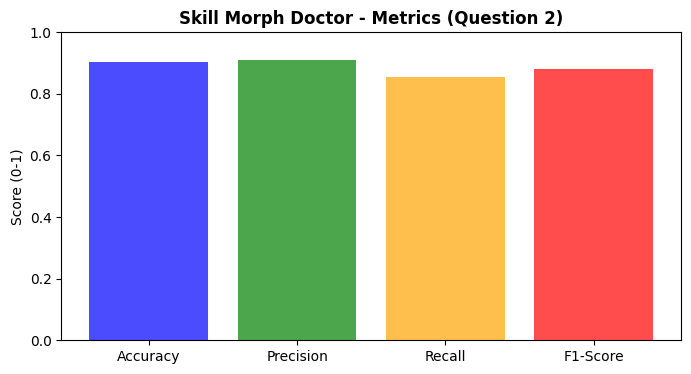

In [19]:
skillmorph_doctor = DecisionTreeClassifier(max_depth=best_depth_task1, random_state=20)
skillmorph_doctor.fit(X_train, y_train)

predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("\n>>> Question 2: Performance Metrics")
print(f"Accuracy  : {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precision : {precision:.3f} ({precision*100:.1f}%)")
print(f"Recall    : {recall:.3f} ({recall*100:.1f}%)")
print(f"F1-Score  : {f1:.3f} ({f1*100:.1f}%)")

plt.figure(figsize=(8,4))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0,1)
plt.title('Skill Morph Doctor - Metrics (Question 2)', fontweight='bold')
plt.ylabel('Score (0-1)')
plt.show()

**Question no 3 ans**

In [20]:
new_patient_predictions = skillmorph_doctor.predict(X_test)
new_patient_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]

print("\n>>> Question 3: Testing on New Patients")
print("Patient | Actual      | Predicted   | Confidence | Correct?")
print("-" * 70)

for i in range(10):  # Show first 10 patients as example
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if new_patient_predictions[i] == 1 else "Benign"
    confidence = new_patient_probabilities[i] * 100 if new_patient_predictions[i] == 1 else (1 - new_patient_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == new_patient_predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:10} | {confidence:8.1f}% | {correct}")


>>> Question 3: Testing on New Patients
Patient | Actual      | Predicted   | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign     |     77.8% | ✅
      2 | Malignant   | Malignant  |    100.0% | ✅
      3 | Malignant   | Malignant  |    100.0% | ✅
      4 | Benign      | Benign     |     94.9% | ✅
      5 | Malignant   | Benign     |    100.0% | ❌
      6 | Malignant   | Malignant  |    100.0% | ✅
      7 | Malignant   | Malignant  |    100.0% | ✅
      8 | Benign      | Benign     |     94.9% | ✅
      9 | Benign      | Benign     |     77.8% | ✅
     10 | Malignant   | Malignant  |     90.0% | ✅


**Qoestion no 4 ans**


>>> Question 4: Confusion Matrix Analysis
[[62  4]
 [ 7 41]]

How to read the Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     62        4   ← False Alarms (predicted malignant but was benign)
Real Malignant  7        41   ← Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: 103
❌ Wrong Predictions: 11

⚠️ DANGER: Missing malignant cancer (7 cases) is more dangerous than false alarms (4 cases)



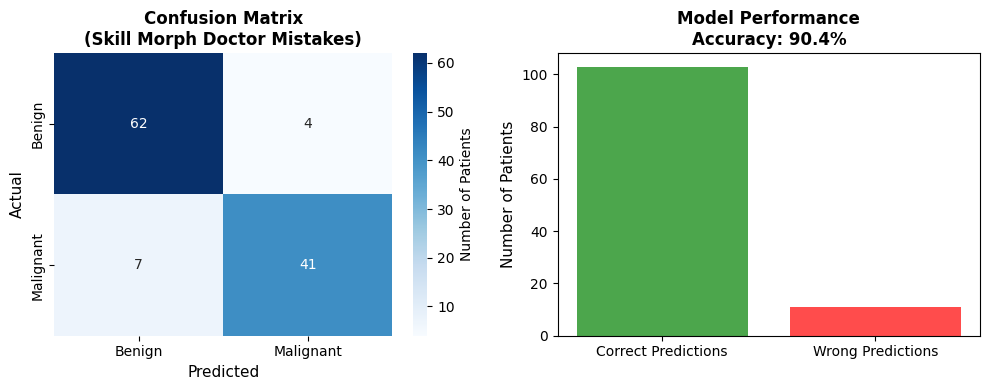

In [21]:
cm = confusion_matrix(y_test, new_patient_predictions)
print("\n>>> Question 4: Confusion Matrix Analysis")
print(cm)

print("\nHow to read the Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← False Alarms (predicted malignant but was benign)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Visualize Confusion Matrix
plt.figure(figsize=(10, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct Predictions', 'Wrong Predictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Model Performance\nAccuracy: {accuracy*100:.1f}%', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()